In [100]:
from limits import LimitFigure, ara_energies, ara_available, ara_projected
import importlib
import limits
import matplotlib as mpl
importlib.reload(limits)
import seaborn as sns

In [101]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
# import warnings
# warnings.filterwarnings("ignore")

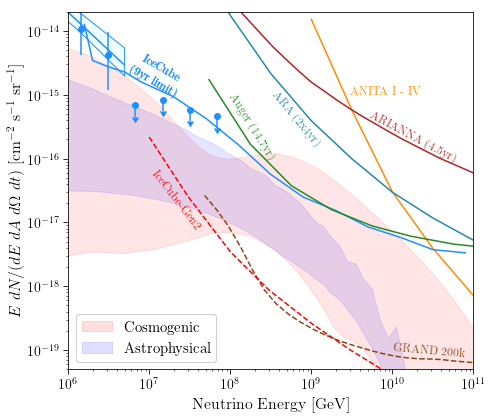

In [103]:
figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(0.5e-19, 2e-14), font_size=16, tick_size=14)
figure.build_base_plot('ara',models = ['ahlers_1', "murase_grb"])
# figure.build_base_plot('ara',models = ["Cuoco_CenA"])
# figure.add_limit('ARA', ara_energies, ara_available*0.9,
#                 stations=2.44, years=1, color='black', linestyle="dotted",
#                 label='Available Data (2012-2019)')
# figure.add_limit('ARA', ara_energies, ara_projected*0.9,
#                 stations=2.44, years=1, color='black', linestyle='dashed',
#                 label='Projected Data (2012-2022)')
# figure.show(legend_size=12, save_name='limit_CenA.png', dpi=200)

# figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(1e-19, 2e-14), font_size=16, tick_size=14)
# figure.build_base_plot('ara_src')
# figure.add_limit('ARA', ara_energies, ara_available*0.9,
#                 stations=2.44, years=1, color='black', linestyle=None,
#                 label='Available Data (2012-2020)')
# figure.add_limit('ARA', ara_energies, ara_projected*0.9,
#                 stations=2.44, years=1, color='black', linestyle='--',
#                 label='Projected Data (2012-2023)')

figure.show(legend_size=15, save_name='limits_plot_AmySnowmass.pdf')

  # Neutrinos per year  

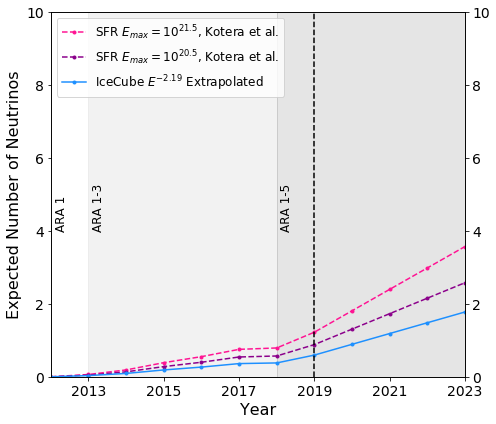

In [4]:
import neutrino_plots
importlib.reload(neutrino_plots)
from limits import (LimitFigure, count_neutrinos, ara_energies,
                    ara_100m, ara_200m, ara_200mpa)

fluxes = {
        "SFR $E_{max}=10^{21.5}$, Kotera et al.": neutrino_plots.kotera_high_e_flux,
        "SFR $E_{max}=10^{20.5}$, Kotera et al.": neutrino_plots.kotera_sfr_flux,
#         "Astrophysical + cosmogenic - saturate limits": neutrino_plots.pulsar_koteraFRII,
#         "Cosmogenic - saturate limits": neutrino_plots.kotera_FRII,
#         "Astrophysical (pulsars)": neutrino_plots.fang_pulsar_max_flux,
        "IceCube $E^{-2.19}$ Extrapolated": lambda e: LimitFigure._i3_nu_fit(e, slope=-2.19, offset=1.01),

#         "100% protons, Ahlers & Halzen": neutrino_plots.ahlers_100_flux,
#         "10% protons, Ahlers & Halzen": neutrino_plots.ahlers_10_flux,
#         "1% protons, Ahlers & Halzen": neutrino_plots.ahlers_1_flux,
    }

styles = {
    "SFR $E_{max}=10^{21.5}$, Kotera et al.": "deeppink.--",
    "SFR $E_{max}=10^{20.5}$, Kotera et al.": "darkmagenta.--",
#     "Astrophysical + cosmogenic - saturate limits": "darkmagenta.-",
#     "Cosmogenic - saturate limits": "deeppink.-",
#     "Astrophysical (pulsars)": "royalblue.-",
    "IceCube $E^{-2.19}$ Extrapolated": "dodgerblue.-",

    
#     "100% protons, Ahlers & Halzen": "mediumblue.-.",
#     "10% protons, Ahlers & Halzen": "royalblue.-.",
#     "1% protons, Ahlers & Halzen": "cornflowerblue.-.",
}

ara_by_year = [284*ara_100m/366, (217+233)*ara_200m/365, (124*ara_100m+(313+304)*ara_200m)/365,
               (345+250)*ara_200m/365, (127*ara_100m+(323+297)*ara_200m)/366, 137*ara_200m/365,
               (316*ara_100m+(303+316+313)*ara_200m+186*ara_200mpa)/365,
               ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa,ara_100m+3*ara_200m+ara_200mpa]

neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
                           years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                           stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"],
                           save_name='yearly_neutrinos_ara_fluxes_2019proposal.pdf',xlim=[2012,2023])


# fluxes = {
#     "AGN, Murase": neutrino_plots.murase_agn_flux,
#     "GRB afterglow-late prompt, Murase": neutrino_plots.murase_grb_late_flux,
#     "GRB afterglow-wind, Murase": neutrino_plots.murase_grb_wind_flux,
#     "GRB afterglow-ISM, Murase": neutrino_plots.murase_grb_ism_flux,
#     "Clusters, Fang & Murase": neutrino_plots.fang_cluster_flux,
# }

# styles = {
#     "AGN, Murase": "red.--",
#     "GRB afterglow-late prompt, Murase": "saddlebrown.-.",
#     "GRB afterglow-wind, Murase": "goldenrod.-.",
#     "GRB afterglow-ISM, Murase": "gold.-.",
#     "Clusters, Fang & Murase": "mediumvioletred.&",
# }

# neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
#                            years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
#                            stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"])#,
# #                            save_name='yearly_neutrinos_ara_sources_2019proposal.pdf')

In [54]:
station_years= [284/366, (217+233)/365, (124+(313+304))/365,
               (345+250)/365, (127+(323+297))/366, 137/365,
               (316+(303+316+313)+186)/365,
               1+3+1, 1+3+1, 1+3*1+1,1+3*1+1]



In [64]:
cumulative=0
year=2012
for i in range(0,len(station_years)):
    cumulative+=station_years[i]
    print(str(year) + "\t"+"%0.2f"%cumulative)
    year+=1

2012	0.78
2013	2.01
2014	4.04
2015	5.67
2016	7.71
2017	8.09
2018	12.01
2019	17.01
2020	22.01
2021	27.01
2022	32.01


In [13]:
import numpy as np

In [17]:
limit = np.array([2.17e-16,2.56e-17,3.48e-18,8.76e-19,2.63e-19,1.01e-19,3.94e-20,1.77e-20])
energy = np.array([1.00e+07,3.00e+07,1.00e+08,3.00e+08,1.00e+09,3.00e+09,1.00e+10,3.00e+10])

In [19]:
limit2 = limit*energy

In [20]:
for i in limit2:
    print(i)

2.17e-09
7.679999999999999e-10
3.48e-10
2.628e-10
2.63e-10
3.03e-10
3.9400000000000004e-10
5.31e-10


In [51]:
GRAND_200k = np.array(([4.26219753e-09, 3.58147708e-09, 2.75670137e-09, 1.85254042e-09,
                        1.13825106e-09, 7.70141315e-10, 6.51758930e-10, 6.35878242e-10,
                        6.69261628e-10, 7.37439217e-10, 8.38784832e-10, 9.81688683e-10,
                        1.18493794e-09, 1.45699379e-09, 1.80867621e-09, 2.26948852e-09,
                        2.91952068e-09, 3.86790849e-09, 5.24530715e-09, 7.31211288e-09,
                        9.98848945e-09, 1.33523293e-08, 1.80893102e-08, 2.46582187e-08,
                        3.41054825e-08, 5.39140368e-08, 3.36553610e-07, 4.57179717e-06,
                        3.59391218e-05, 1.47550853e-04, 3.33777479e-04, 4.92873322e-04,
                        6.68381070e-04, 1.72553598e-03, 7.06643413e-03, 2.10754560e-02,
                        4.06319101e-02, 5.88162853e-02, 7.45423652e-02, 8.83700084e-02]))

In [ ]:
for i in limit2:
    print(i)